Final dataset size: (101, 28, 28, 1)


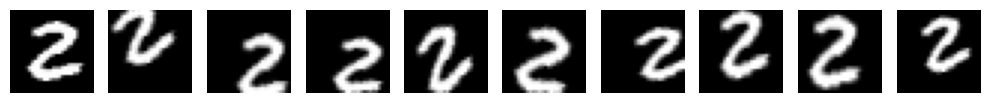

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load a random MNIST image
(X_train, Y_train), (_, _) = mnist.load_data()
image = X_train[25]  # A single digit image
image = image.reshape((1, 28, 28, 1)).astype('float32') / 255.0

# Set up the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Augment and collect 100 new images
aug_iter = datagen.flow(image, batch_size=1)
augmented_images = []

for i in range(100):
    aug_img = next(aug_iter)[0]
    augmented_images.append(aug_img)

# Convert to numpy array
augmented_images = np.array(augmented_images)  # shape: (100, 28, 28, 1)

# Optionally combine with original image
final_dataset = np.vstack([image, augmented_images])  # shape: (101, 28, 28, 1)

print("Final dataset size:", final_dataset.shape)

# Visualize first 10 images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(final_dataset[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
